# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [2]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install matplotlib.pyplot
!pip install seaborn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
   

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])


The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

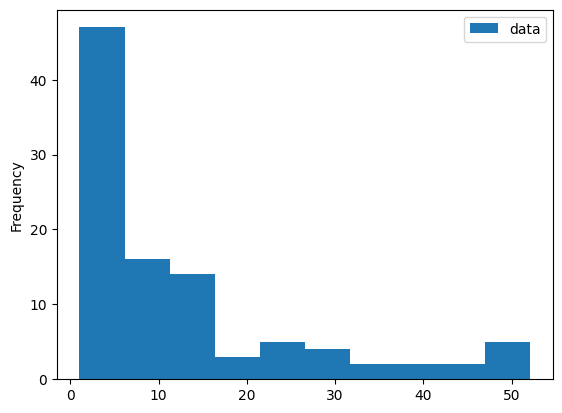

In [4]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

  "A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices." 

##### Histogram: 1st choice
### PROS:  
    great visual on the pharmacys sales on lower costing drugs (under $15) More than half of their sales are under the $15 mark.  
    also shows the difference in price that the administrator wanted to know 
    not many drugs are sold over $50 
### CONS:  
    its difficult to see the exact prices and exact difference of price  
    I would add lines to the boxes for this and possible figures for frequency on top of each box  




<Axes: >

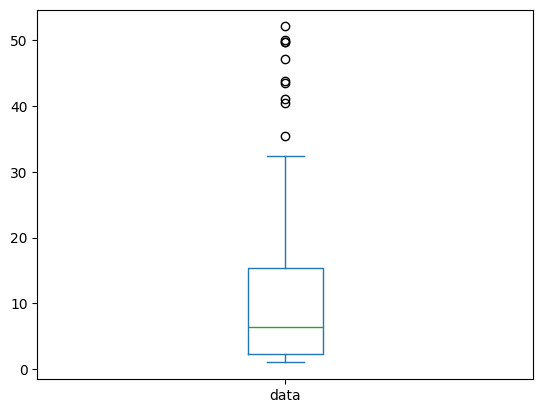

In [5]:
df.plot.box()

##### Box and Whisker: 2nd Choice
### PROS:  
    decent visual that the more expensive drugs are outliers in the plot.  
    the box is clearly between $5-15 for the average cost of drugs bought as this pharmacy
    the quantiles are easy to see

### CONS:  
    frequency of purchases is hard to visualize.  Therefore I think the question that the adminitrator is asking is harder to visualize an answer. You would have to provide actual numbers     
    

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [6]:
MA_unemployment = pd.read_csv('UnemploymentReport_MA.csv')
MA_unemployment

#
#MA_unemployment.drop(columns=['FIPS']) - Asked AI why this wasnt working and it suggested that pandas doesnt see 
# a column named FIPS... that there may be characters there that I am missing.
# There was a space after FIPS ['FIPS '] crazy

MA_unemployment = MA_unemployment.drop(columns=['FIPS ', 'Unnamed: 12']) # this information is irrelavant


Convert the dollars and percent to just numeric values 

In [7]:
MA_unemployment['Median Household Income (2022)'] = (MA_unemployment['Median Household Income (2022)'].str.replace(r'[$,]', '', regex=True).astype(float))

In [8]:
MA_unemployment['% of State Median HH Income'] = (MA_unemployment['% of State Median HH Income'].str.replace('%', '', regex=False).astype(float))

In [9]:
MA_unemployment

,Name,2015,2016,2017,2018,2019,2020,2021,2022,2023,Median Household Income (2022),% of State Median HH Income
0,Massachusetts,4.8,4.0,3.8,3.5,3.0,9.3,5.4,3.7,3.4,94538.0,100.0
1,"Barnstable County, MA",6.1,5.1,4.8,4.5,4.0,10.7,6.3,4.6,4.2,89774.0,95.0
2,"Berkshire County, MA",5.4,4.7,4.5,4.2,3.7,9.9,6.3,4.3,3.6,71102.0,75.2
3,"Bristol County, MA",6.1,5.1,4.9,4.4,3.9,10.7,6.1,4.5,4.1,80702.0,85.4
4,"Dukes County, MA",6.5,5.3,5.0,4.8,4.3,10.3,6.2,5.0,4.4,89136.0,94.3
5,"Essex County, MA",5.0,4.1,3.9,3.6,3.1,10.3,6.0,3.8,3.5,92118.0,97.4
6,"Franklin County, MA",4.4,3.6,3.4,3.1,2.8,7.9,4.7,3.3,2.9,69929.0,74.0
7,"Hampden County, MA",6.4,5.4,5.2,4.8,4.3,10.9,7.1,4.8,4.3,64030.0,67.7
8,"Hampshire County, MA",4.5,3.8,3.5,3.1,2.8,7.5,4.4,3.3,2.9,81878.0,86.6
9,"Middlesex County, MA",3.9,3.3,3.1,2.8,2.4,7.6,4.4,3.0,2.9,118494.0,125.3


In [10]:
MA_unemployment.iloc[1:15].describe()

# I took out the MA row so that the desribe only accounted for the 14 counties as the MA row was just an average of all 

,2015,2016,2017,2018,2019,2020,2021,2022,2023,Median Household Income (2022),% of State Median HH Income
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,5.178571,4.335714,4.121429,3.821429,3.392857,9.685714,5.735714,4.078571,3.707143,89558.500000,94.735714
std,0.847783,0.707767,0.691908,0.715949,0.696656,1.319590,0.905205,0.860392,0.800446,16596.260745,17.553505
min,3.900000,3.300000,3.100000,2.800000,2.400000,7.500000,4.400000,3.000000,2.900000,64030.000000,67.700000
25%,4.425000,3.725000,3.500000,3.100000,2.800000,8.825000,4.975000,3.350000,3.125000,80996.000000,85.700000
50%,5.100000,4.250000,4.000000,3.700000,3.250000,10.050000,5.850000,3.850000,3.500000,87607.000000,92.700000
75%,5.925000,5.000000,4.725000,4.475000,3.975000,10.600000,6.275000,4.575000,4.175000,100014.750000,105.800000
max,6.500000,5.400000,5.200000,4.800000,4.400000,11.800000,7.200000,6.100000,5.800000,118494.000000,125.300000


In [11]:
MA_unemployment.iloc[1:15].mode()

,Name,2015,2016,2017,2018,2019,2020,2021,2022,2023,Median Household Income (2022),% of State Median HH Income
0,"Barnstable County, MA",4.4,5.1,3.4,3.1,2.8,9.9,4.4,3.3,2.9,64030.0,67.7
1,"Berkshire County, MA",5.1,NaN,3.5,NaN,4.3,10.3,6.3,3.8,3.5,69929.0,74.0
2,"Bristol County, MA",5.4,NaN,4.0,NaN,NaN,10.7,NaN,NaN,NaN,71102.0,75.2
3,"Dukes County, MA",6.1,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,80702.0,85.4
4,"Essex County, MA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81878.0,86.6
5,"Franklin County, MA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84548.0,89.4
6,"Hampden County, MA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86078.0,91.1
7,"Hampshire County, MA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89136.0,94.3
8,"Middlesex County, MA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89774.0,95.0
9,"Nantucket County/town, MA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92118.0,97.4


#### Histogram for unployment rate per county in MA per year


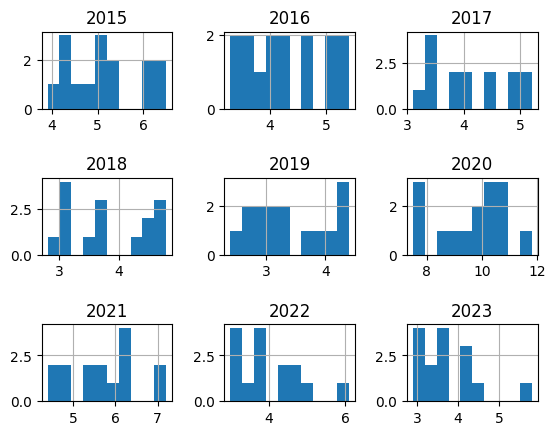

In [12]:
ave_yearly = MA_unemployment[['Name', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]
ave_yearly.hist()
plt.subplots_adjust(wspace=0.4, hspace=0.9)

These plots give a nice visual for how ever county did in comparison to another every year (2015-2023) It just doesnt show which is which county.

In [13]:
below_med_income= MA_unemployment[MA_unemployment['Median Household Income (2022)'] <= 94538]
below_med_income

,Name,2015,2016,2017,2018,2019,2020,2021,2022,2023,Median Household Income (2022),% of State Median HH Income
0,Massachusetts,4.8,4.0,3.8,3.5,3.0,9.3,5.4,3.7,3.4,94538.0,100.0
1,"Barnstable County, MA",6.1,5.1,4.8,4.5,4.0,10.7,6.3,4.6,4.2,89774.0,95.0
2,"Berkshire County, MA",5.4,4.7,4.5,4.2,3.7,9.9,6.3,4.3,3.6,71102.0,75.2
3,"Bristol County, MA",6.1,5.1,4.9,4.4,3.9,10.7,6.1,4.5,4.1,80702.0,85.4
4,"Dukes County, MA",6.5,5.3,5.0,4.8,4.3,10.3,6.2,5.0,4.4,89136.0,94.3
5,"Essex County, MA",5.0,4.1,3.9,3.6,3.1,10.3,6.0,3.8,3.5,92118.0,97.4
6,"Franklin County, MA",4.4,3.6,3.4,3.1,2.8,7.9,4.7,3.3,2.9,69929.0,74.0
7,"Hampden County, MA",6.4,5.4,5.2,4.8,4.3,10.9,7.1,4.8,4.3,64030.0,67.7
8,"Hampshire County, MA",4.5,3.8,3.5,3.1,2.8,7.5,4.4,3.3,2.9,81878.0,86.6
13,"Suffolk County, MA",4.4,3.7,3.5,3.1,2.7,10.2,5.6,3.5,3.2,84548.0,89.4


I wanted to keep the [0] row as thats MA as a whole. Some years there counties had below average unemployment rate but still were below the median household income

<Axes: ylabel='Density'>

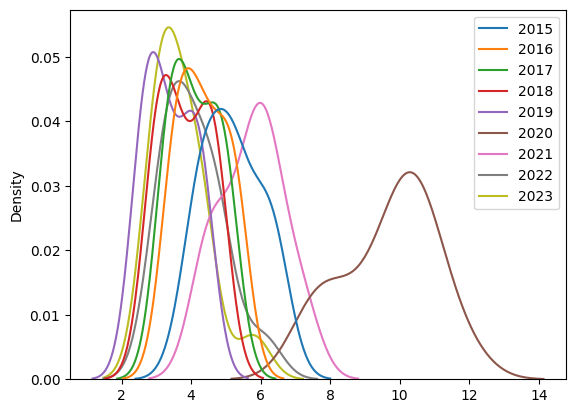

In [14]:
MA_unemployment_2 = MA_unemployment.drop(columns=['Median Household Income (2022)', '% of State Median HH Income'])
sns.kdeplot(MA_unemployment_2[1:15]) # I took the MA average out of this one

I think the KDE graph is nice looking but it doesnt show a true perspective.  It shows values that are not even present in the dataset. For example the year 2020 never had a value of 14 yet the KDE makes it look like it did. 

<Axes: >

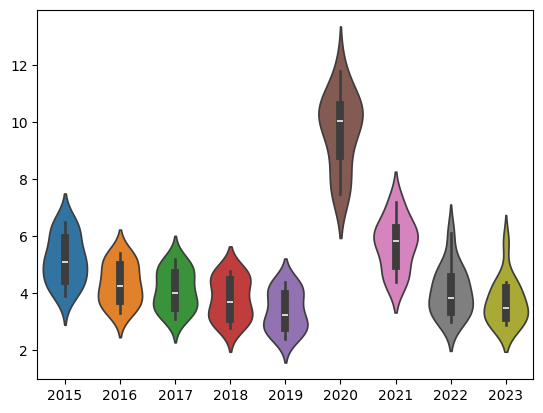

In [15]:
sns.violinplot(MA_unemployment_2[1:15])

Again representing values that don't exsist.  

<Axes: >

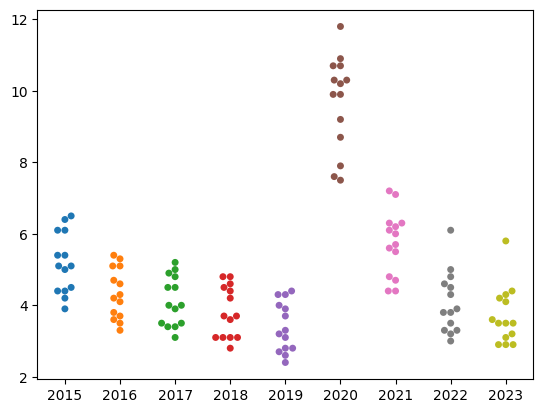

In [16]:
sns.swarmplot(MA_unemployment_2[1:15])

/tmp/ipykernel_19738/2526675483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= MA_unemployment_2['Name'], y = MA_unemployment_2['2020'], palette=colors)


Text(0, 0.5, 'Rate of Unemployment')

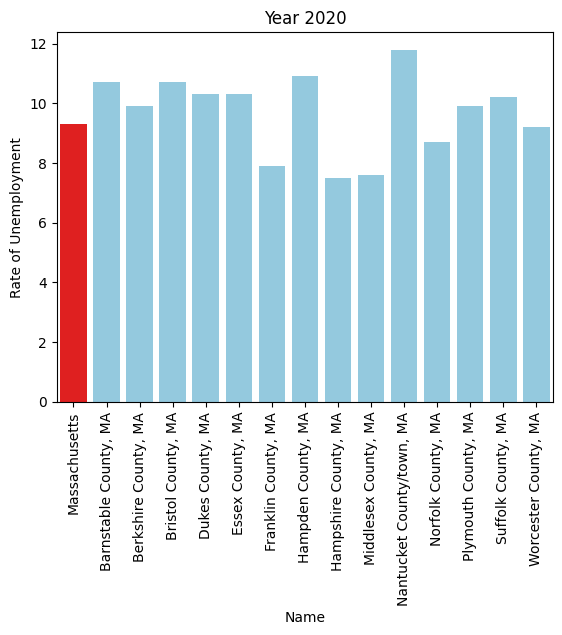

In [17]:
colors = ['skyblue'] * len(MA_unemployment_2['2020'])
colors[0] ='red'
sns.barplot(x= MA_unemployment_2['Name'], y = MA_unemployment_2['2020'], palette=colors)
plt.xticks(rotation=90)
plt.title('Year 2020')
plt.ylabel('Rate of Unemployment')

In [18]:
#Read and clean the data 
US_unemployment = pd.read_csv('UnemploymentReport.csv')

US_unemployment = US_unemployment.drop(columns=['FIPS ', 'Unnamed: 0', 'Unnamed: 13'])
US_unemployment = US_unemployment.drop([52])

# Take out the dollar sign for better graphing
US_unemployment['Median Household Income (2022)'] = (US_unemployment['Median Household Income (2022)'].str.replace(r'[$,]', '', regex=True).astype(float))

In [19]:
US_unemployment

,Name,2015,2016,2017,2018,2019,2020,2021,2022,2023,Median Household Income (2022)
0,Alabama,6.1,5.9,4.5,3.9,3.2,6.4,3.4,2.5,2.5,59703.0
1,Alaska,6.3,6.6,6.5,6.0,5.6,8.3,6.4,4.2,4.2,88072.0
2,Arizona,6.1,5.5,5.0,4.8,4.8,7.8,5.1,3.8,3.9,74355.0
3,Arkansas,5.0,4.0,3.7,3.7,3.5,6.2,4.0,3.2,3.3,55505.0
4,California,6.3,5.5,4.8,4.2,4.1,10.1,7.3,4.3,4.8,91517.0
5,Colorado,3.7,3.1,2.6,3.0,2.7,6.8,5.5,3.1,3.2,89096.0
6,Connecticut,5.6,4.8,4.4,3.9,3.6,8.0,6.4,4.1,3.8,88182.0
7,Delaware,4.8,4.5,4.5,3.7,3.6,7.5,5.5,4.3,4.0,81933.0
8,District of Columbia,6.9,6.2,6.1,5.7,5.5,7.9,6.8,4.7,4.9,99897.0
9,Florida,5.5,4.9,4.3,3.6,3.3,8.1,4.7,3.0,2.9,69287.0


In [20]:
US_unemployment.describe()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,Median Household Income (2022)
count,52.000000,52.000000,52.000000,52.000000,52.000000,51.000000,52.000000,52.000000,52.000000,51.000000
mean,5.146154,4.788462,4.286538,3.873077,3.673077,7.364706,4.890385,3.438462,3.384615,74491.627451
std,1.459178,1.409861,1.300532,1.106508,1.048456,1.843347,1.315408,0.832938,0.831107,12250.938909
min,2.800000,2.900000,2.200000,2.400000,2.100000,4.200000,2.600000,2.000000,1.900000,52788.000000
25%,4.275000,3.975000,3.500000,3.150000,3.075000,6.200000,3.900000,2.800000,2.900000,66847.000000
50%,5.150000,4.750000,4.300000,3.850000,3.500000,7.300000,5.000000,3.350000,3.250000,72279.000000
75%,6.000000,5.400000,4.800000,4.250000,4.100000,8.250000,5.625000,4.025000,3.900000,84090.500000
max,12.000000,11.800000,10.800000,9.200000,8.300000,13.500000,7.900000,6.000000,5.900000,99897.000000


### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!    
        Data is usable, slightly what wasexpected. Though lower than average household income does not mean above average unemployment rate in MA

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?  
        Skewed, there are some cases in which the mean is greater than the median 

- Are there any outliers present?  (Data points that are far from the others.)  
        Outliers would be the year of 2020 due to pandemic

- If there are multiple related histograms, how does the distribution change across different groups?
        

- What are the minimum and maximum values represented in each histogram?  
        Each histogram represents the percentage of unemployment in each county

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?  
        yes, bins affect the histogram but did not change pattern.

- Does the distribution appear normal, or does it have a different distribution?  
        It is not a normal distribution, not all lines created are a nice bell curve for distibution, there are some hills and valleys within the lines, which make me think Bimodal and this is due to a pandemic.... 

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

In [21]:
storytelling = pd.DataFrame({"Category":['Cat 1', 'Cat 2', 'Cat 3', 'Cat 4', 'Cat 5'], 
                             "A": [5, 4, 7, 5, 2], 
                             "B": [3, 6, 3, 7, 2]})
storytelling

,Category,A,B
0,Cat 1,5,3
1,Cat 2,4,6
2,Cat 3,7,3
3,Cat 4,5,7
4,Cat 5,2,2


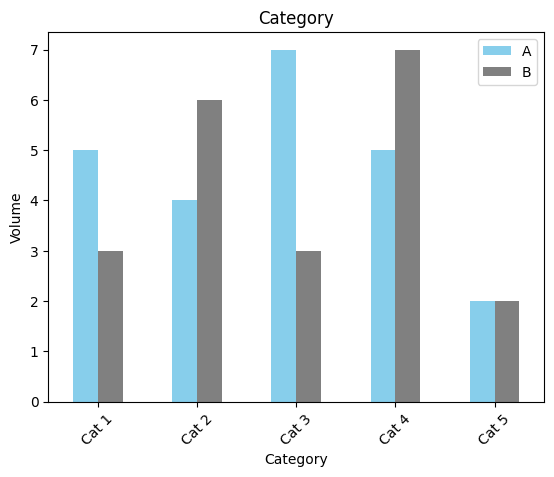

In [22]:
storytelling.set_index("Category").plot(kind="bar", title="Category", color=["skyblue", "gray"])
plt.ylabel("Volume")
plt.xticks(rotation=45)
plt.show()